In [25]:
import pandas as pd
import numpy as np
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
import os
import json
s = json.load(open(os.getenv('PUI2015')+'/plotstyle.json'))
plt.rcParams.update(s)
%matplotlib inline

In [26]:
# have a quick look at the data
path = '/Users/eliseowang/Documents/AppliedDataScience/project/sh_test.csv'
data = pd.read_csv(path)
data.head()

,genCategory,category,name,lon,lat,checkIns,tips,users,createdAt,tileID,ID,query,time,verified,price,rating,tags,photoCount,description
0,Travel & Transport,Hotel,上海天禧嘉福酒店 Skyfortune Boutique Hotel,121.390842,31.183345,217,3,136,2011.09.21,0_00_00_00_10,4e79a8e88877bac8d1cbbfbd,China_Shanghai,2015.11.08 22:54:55,False,-1,-1,NaN,23,NaN
1,NaN,Szechuan Restaurant,四川香天下,121.392031,31.183549,9,0,3,2015.08.01,0_00_00_00_10,55bcad8a498e6bfc6d59ee71,China_Shanghai,2015.11.08 22:54:55,False,-1,-1,NaN,1,NaN
2,Outdoors & Recreation,Golf Course,Hongqiao Golf Driving range,121.386053,31.187153,169,3,82,2012.04.02,0_00_00_00_10,4f79acbfe4b0795c3a0102d6,China_Shanghai,2015.11.08 22:54:56,False,-1,-1,NaN,12,NaN
3,Shop & Service,Electronics Store,蘇寧電器吳中路,121.389871,31.182312,10,0,6,2013.01.06,0_00_00_00_10,50e91cfae4b09c384603f0fa,China_Shanghai,2015.11.08 22:54:56,False,-1,-1,NaN,2,NaN
4,Food,Japanese Restaurant,龙之介炉端烧,121.387928,31.182557,120,1,51,2010.08.20,0_00_00_00_10,4c6e686c65eda093bd4251d0,China_Shanghai,2015.11.08 22:54:56,False,-1,-1,NaN,8,NaN


We are assuming the users of 4square are homogeneous group of people with similar behaviors. Foursquare users are considered sensors around the world, reflecting the data.

## See what the unique categories are (in alphabetical order)

In [27]:
catValues = sorted(data['genCategory'].unique())
catValues

[nan,
 'Arts & Entertainment',
 'College & University',
 'Event',
 'Food',
 'Nightlife Spot',
 'Outdoors & Recreation',
 'Professional & Other Places',
 'Residence',
 'Shop & Service',
 'Travel & Transport']

## Create a categorical value for each category string (not necessary but just in case you need it in your column)

In [217]:
# create a dictionary of string-int pair.
unique = {catValues[i]:i for i in range(len(catValues))}
# set the numerical value of NaNs to np.nan
unique[np.nan] = np.nan
unique

{nan: nan,
 'Arts & Entertainment': 1,
 'College & University': 2,
 'Event': 3,
 'Food': 4,
 'Nightlife Spot': 5,
 'Outdoors & Recreation': 6,
 'Professional & Other Places': 7,
 'Residence': 8,
 'Shop & Service': 9,
 'Travel & Transport': 10}

In [220]:
# transform the dic into a dataframe
cateValues = pd.DataFrame(unique, 
                      index=[1]).T.reset_index().rename(columns={'index':'genCategory',
                                                                 1:'CateValue'})
cateValues

,genCategory,CateValue
0,NaN,NaN
1,Arts & Entertainment,1
2,College & University,2
3,Event,3
4,Food,4
5,Nightlife Spot,5
6,Outdoors & Recreation,6
7,Professional & Other Places,7
8,Residence,8
9,Shop & Service,9


In [224]:
# give pair the genCategory of each row with the corresponding categorical value
data2 = data.merge(cateValues, how='left', on='genCategory')
data2.head()

,genCategory,category,name,lon,lat,checkIns,tips,users,createdAt,tileID,ID,query,time,verified,price,rating,tags,photoCount,description,CateValue
0,Travel & Transport,Hotel,上海天禧嘉福酒店 Skyfortune Boutique Hotel,121.390842,31.183345,217,3,136,2011.09.21,0_00_00_00_10,4e79a8e88877bac8d1cbbfbd,China_Shanghai,2015.11.08 22:54:55,False,-1,-1,NaN,23,NaN,10
1,NaN,Szechuan Restaurant,四川香天下,121.392031,31.183549,9,0,3,2015.08.01,0_00_00_00_10,55bcad8a498e6bfc6d59ee71,China_Shanghai,2015.11.08 22:54:55,False,-1,-1,NaN,1,NaN,NaN
2,Outdoors & Recreation,Golf Course,Hongqiao Golf Driving range,121.386053,31.187153,169,3,82,2012.04.02,0_00_00_00_10,4f79acbfe4b0795c3a0102d6,China_Shanghai,2015.11.08 22:54:56,False,-1,-1,NaN,12,NaN,6
3,Shop & Service,Electronics Store,蘇寧電器吳中路,121.389871,31.182312,10,0,6,2013.01.06,0_00_00_00_10,50e91cfae4b09c384603f0fa,China_Shanghai,2015.11.08 22:54:56,False,-1,-1,NaN,2,NaN,9
4,Food,Japanese Restaurant,龙之介炉端烧,121.387928,31.182557,120,1,51,2010.08.20,0_00_00_00_10,4c6e686c65eda093bd4251d0,China_Shanghai,2015.11.08 22:54:56,False,-1,-1,NaN,8,NaN,4


## Plot all the general categories on the same figure using different colors for each category.

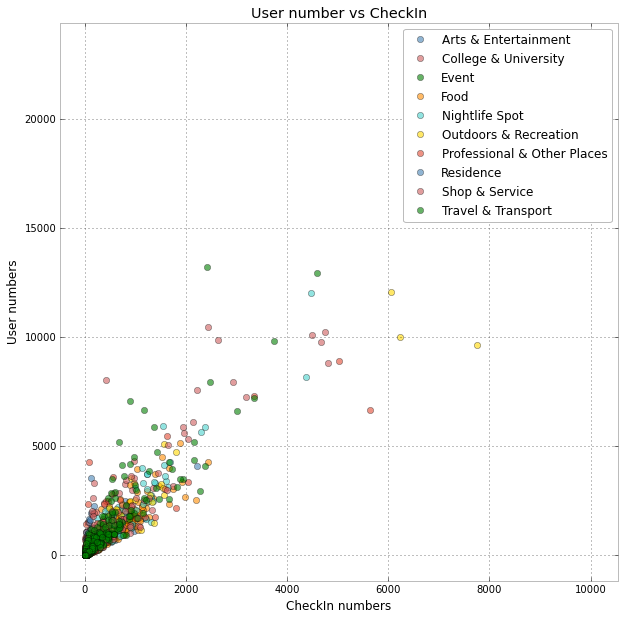

In [216]:
# group the data by general category
groups = data2.groupby('genCategory')
# create a 10 * 10 figure
fig, ax = plt.subplots(figsize=(10,10))
# add 5% padding to the autoscaling
ax.margins(0.05)
# plot all the general categories
for name, group in groups:
    ax.plot(group.users, group.checkIns, marker='o',
            linestyle='', ms=6, alpha=.6, label=name )

ax.set_ylabel('User numbers')
ax.set_xlabel('CheckIn numbers')
ax.set_title('User number vs CheckIn')
ax.legend()
ax.legend(numpoints=1)   

## plot each general category on a different figure

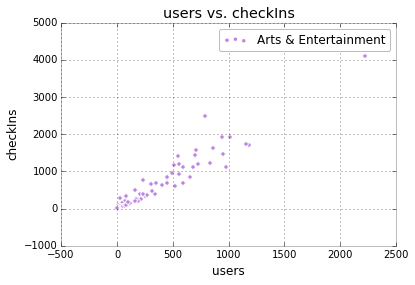

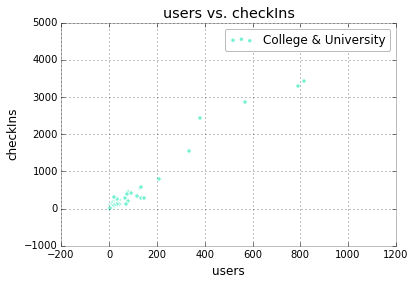

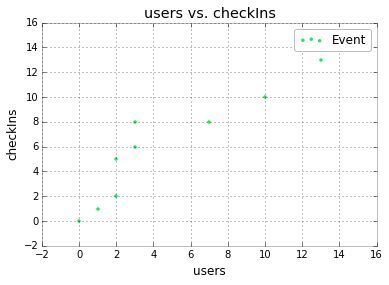

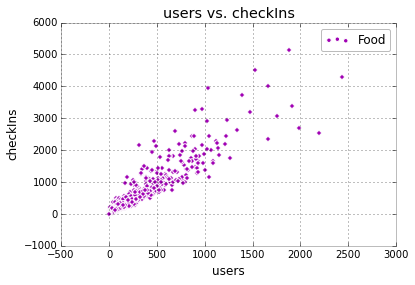

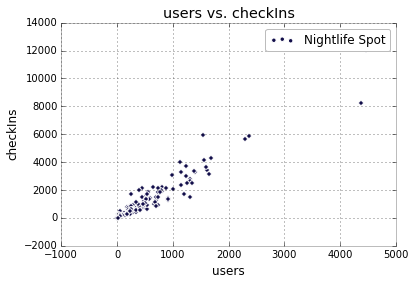

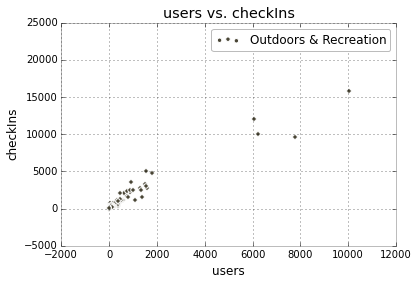

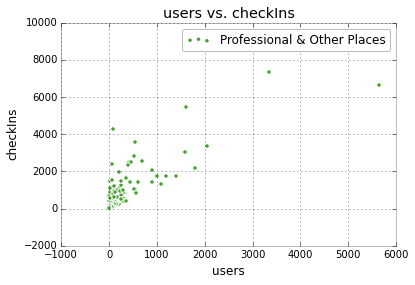

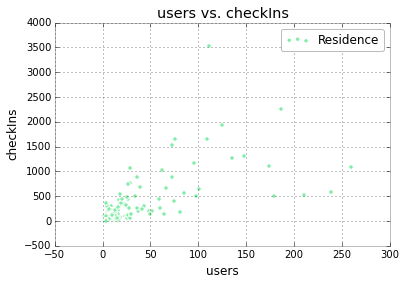

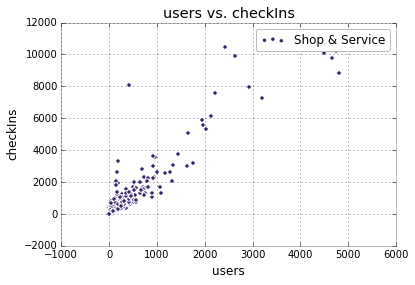

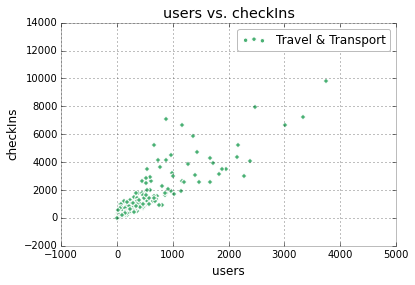

In [237]:
np.random.seed(2015)
# create a 10 * 10 figure
fig1= plt.figure(figsize=(10,10))
for name, group in groups:
    group.plot(x='users', y='checkIns', 
               kind='scatter',label=name, 
               title='users vs. checkIns',
               color=np.random.rand(3))

IndexError: indices are out-of-bounds

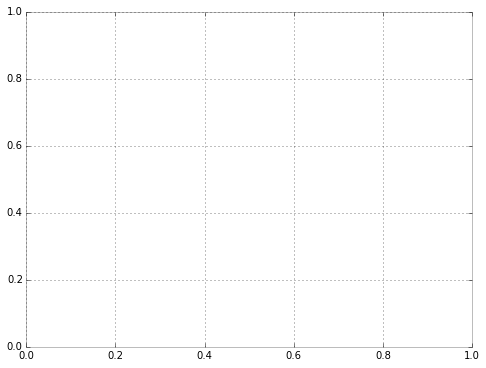

In [226]:
fig1 = plt.figure(figsize=(8,6))
ax1 = fig1.add_subplot(111)
for col, i in data2.groupby('genCategory'):
    i.plot(x=i['users'], y=i['checkIns'], 
           s=40, label=col, c=col)
    
#genCategory = colorIndex = 5

In [32]:
names = ['NaN','arts', 'college', 'event', 'food', 'night',
         'outdoor', 'profe', 'resi', 'shop', 'travel']

In [33]:
for i in range(len(names)):
    names[i] = data2[data2['colorIndex'] == i]

In [34]:
names[1]

,genCategory,category,name,lon,lat,checkIns,tips,users,createdAt,tileID,ID,query,time,verified,price,rating,tags,photoCount,description,colorIndex
136,Arts & Entertainment,Concert Hall,上海群众艺术馆,121.420325,31.188481,38,1,32,2011.10.02,0_00_00_01_11,4e884dbf6c25412eec99061f,China_Shanghai,2015.11.08 22:55:56,False,-1,-1.0,NaN,10,NaN,1
173,Arts & Entertainment,Art Gallery,Minsheng Art Museum,121.419158,31.201349,343,7,250,2010.02.28,0_00_00_11_11,4b8a3aa7f964a520e06432e3,China_Shanghai,2015.11.08 22:57:07,False,-1,7.3,"art, museum, shanghai;gallery",108,NaN,1
190,Arts & Entertainment,Stadium,上海体育馆 | Shanghai Indoor Stadium,121.433687,31.183287,1919,6,942,2009.11.19,0_00_01_00_10,4b0588bff964a520bbd722e3,China_Shanghai,2015.11.08 22:57:31,False,-1,5.1,万人体育馆;万体馆;上体馆;体育馆,175,NaN,1
199,Arts & Entertainment,Movie Theater,上海电影博物馆 | Shanghai Film Museum,121.432770,31.188174,247,3,191,2013.06.17,0_00_01_00_10,51befe20498e1f9924a6fa4b,China_Shanghai,2015.11.08 22:57:32,False,-1,5.8,NaN,57,NaN,1
201,Arts & Entertainment,Art Gallery,画家街,121.427440,31.187682,72,1,40,2011.07.26,0_00_01_00_10,4e2e94b7d22daa76ed8d1104,China_Shanghai,2015.11.08 22:57:32,False,-1,-1.0,NaN,6,NaN,1
206,Arts & Entertainment,Art Gallery,Rain Room,121.455124,31.178391,2,0,2,2015.10.25,0_00_01_01_00,562c7fe6498e640cb4ec4c72,China_Shanghai,2015.11.08 22:57:54,False,-1,-1.0,NaN,2,NaN,1
211,Arts & Entertainment,Art Gallery,2577创意大院,121.451234,31.179808,135,0,20,2011.02.28,0_00_01_01_00,4d6b47be8fe6a143a9a0f2a3,China_Shanghai,2015.11.08 22:57:54,False,-1,-1.0,NaN,2,NaN,1
215,Arts & Entertainment,Art Museum,Shanghai Center of Photography,121.454559,31.174546,1,0,1,2015.05.28,0_00_01_01_00,5566d566498ef008974411a2,China_Shanghai,2015.11.08 22:57:55,False,-1,-1.0,NaN,0,NaN,1
246,Arts & Entertainment,Art Museum,YUZ Museum 余德耀美術館,121.457711,31.172560,191,1,164,2014.05.17,0_00_01_01_01,537733a5498ee64df617728a,China_Shanghai,2015.11.08 22:58:20,False,-1,8.9,NaN,70,NaN,1
257,Arts & Entertainment,Art Museum,上海冰雕艺术馆,121.464911,31.177205,1,0,1,2013.05.26,0_00_01_01_01,51a19f54498e88b70054239f,China_Shanghai,2015.11.08 22:58:22,False,-1,-1.0,NaN,0,NaN,1


In [35]:
# arts = data2[data2['colorIndex'] == 1]
# college = data2[data2['colorIndex'] == 2]
# event = data2[data2['colorIndex'] == 3]
# food = data2[data2['colorIndex'] == 4]
# night = data2[data2['colorIndex'] == 5]
# outdoor = data2[data2['colorIndex'] == 6]
# profe = data2[data2['colorIndex'] == 7]
# resi = data2[data2['colorIndex'] == 8]
# shop = data2[data2['colorIndex'] == 9]
# travel = data2[data2['colorIndex'] == 10]
# NaN = data2[data2['colorIndex'] == np.nan]

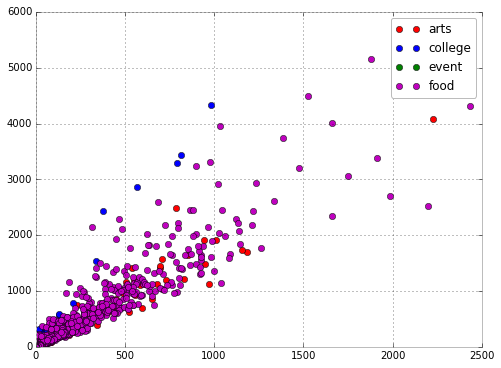

In [36]:
# fig = plt.figure(figsize=(8,6))
# plt.plot(arts['users'], arts['checkIns'], 'ro',label='arts')
# plt.plot(college['users'], college['checkIns'], 'bo',label='college')
# plt.plot(event['users'], event['checkIns'], 'go', label='event')
# plt.plot(food['users'], food['checkIns'], 'mo', label='food')

# plt.legend()

In [37]:
lm = smf.ols(formula='Y ~ X - 1', data={'Y':data2.checkIns, 'X':data2.users}).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      Y   R-squared:                       0.853
Model:                            OLS   Adj. R-squared:                  0.853
Method:                 Least Squares   F-statistic:                 5.850e+04
Date:                Tue, 10 Nov 2015   Prob (F-statistic):               0.00
Time:                        16:52:08   Log-Likelihood:                -71317.
No. Observations:               10075   AIC:                         1.426e+05
Df Residuals:                   10074   BIC:                         1.426e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
X              2.1457      0.009    241.876      0.000         2.128     2.163
==============================================================================
Omnibus:                    12712.549   Durbin-Watson:                   1.748
Prob(Omnibus):                  0.000   Jarque-Bera (JB):         25802680.982
Skew:                           5.968   Prob(JB):                         0.00
Kurtosis:                     250.635   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [38]:
data2[['genCategory', 'checkIns', 'users']].head(10)

,genCategory,checkIns,users
0,Travel & Transport,217,136
1,NaN,9,3
2,Outdoors & Recreation,169,82
3,Shop & Service,10,6
4,Food,120,51
5,Food,1,1
6,Outdoors & Recreation,162,67
7,NaN,9,9
8,Food,26,8
9,Shop & Service,2,2


In [39]:
dataSum = data2[['genCategory', 'checkIns',
       'users']].groupby('genCategory').agg({'checkIns':sum,
                                             'users':'count'}).T

In [40]:
dataSum.head(10)
dataSum.T
dataAll = dataSum.merge(colors, how='left', on='genCategory')

KeyError: 'genCategory'

In [ ]:
for i in dataSum:
    plt.scatter(dataSum[i][1], 
            dataSum[i][0], label=i,color=dataSum[i])
plt.legend()

In [ ]:
#plt.plot(data.users, data.checkIns, 'ro', color=data.numeric)
fig1 = plt.figure(figsize=(10,10))
for i in data2.ix(:):
    plt.scatter(data2.users, data2.checkIns,
            s=40, c=data2.colorIndex, label)
plt.plot(data2.users, lm.predict(), 'r')
#ax1.plot(np.log(data.users), np.log(data.checkIns), 'bo')
plt.xlabel('users, log scale', fontsize=20)
plt.ylabel('check-ins, log scale', fontsize=20)
plt.title('Users vs check-ins', fontsize= 30)
plt.legend(labels=data2.colorIndex)